In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import StratifiedKFold

from CrabNet_spacegroup.kingcrab import CrabNet
from CrabNet_spacegroup.model import Model
from CrabNet_spacegroup.get_compute_device import get_compute_device

from sklearn.metrics import mean_absolute_error as mae, \
                            r2_score as r2, \
                            mean_squared_error as mse

compute_device = get_compute_device()

In [2]:
from pymatgen.core import Composition

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['Times New Roman'],
    "font.size": 24,# 
    'axes.unicode_minus': False 
}
rcParams.update(config)
plt.rcParams['axes.unicode_minus'] = False  
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (8, 6),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300 

In [114]:
model = Model(CrabNet(compute_device=compute_device).to(compute_device),
                      verbose=True, classification=False)
model.load_network('./models/trained_models/fold_1_spacegroup.pth')


Model architecture: out_dims, d_model, N, heads
3, 512, 2, 4
Running on compute device: cpu
Model size: 11992839 parameters



Generating EDM: 100%|██████████| 101/101 [00:00<00:00, 58102.41formulae/s]

loading data with up to 4 elements in the formula



Generating EDM: 100%|██████████| 101/101 [00:00<00:00, 96695.89formulae/s]


loading data with up to 4 elements in the formula
loading data with up to 4 elements in the formula
loading data with up to 4 elements in the formula
loading data with up to 4 elements in the formula


Text(0.5, 0, '$ x$')

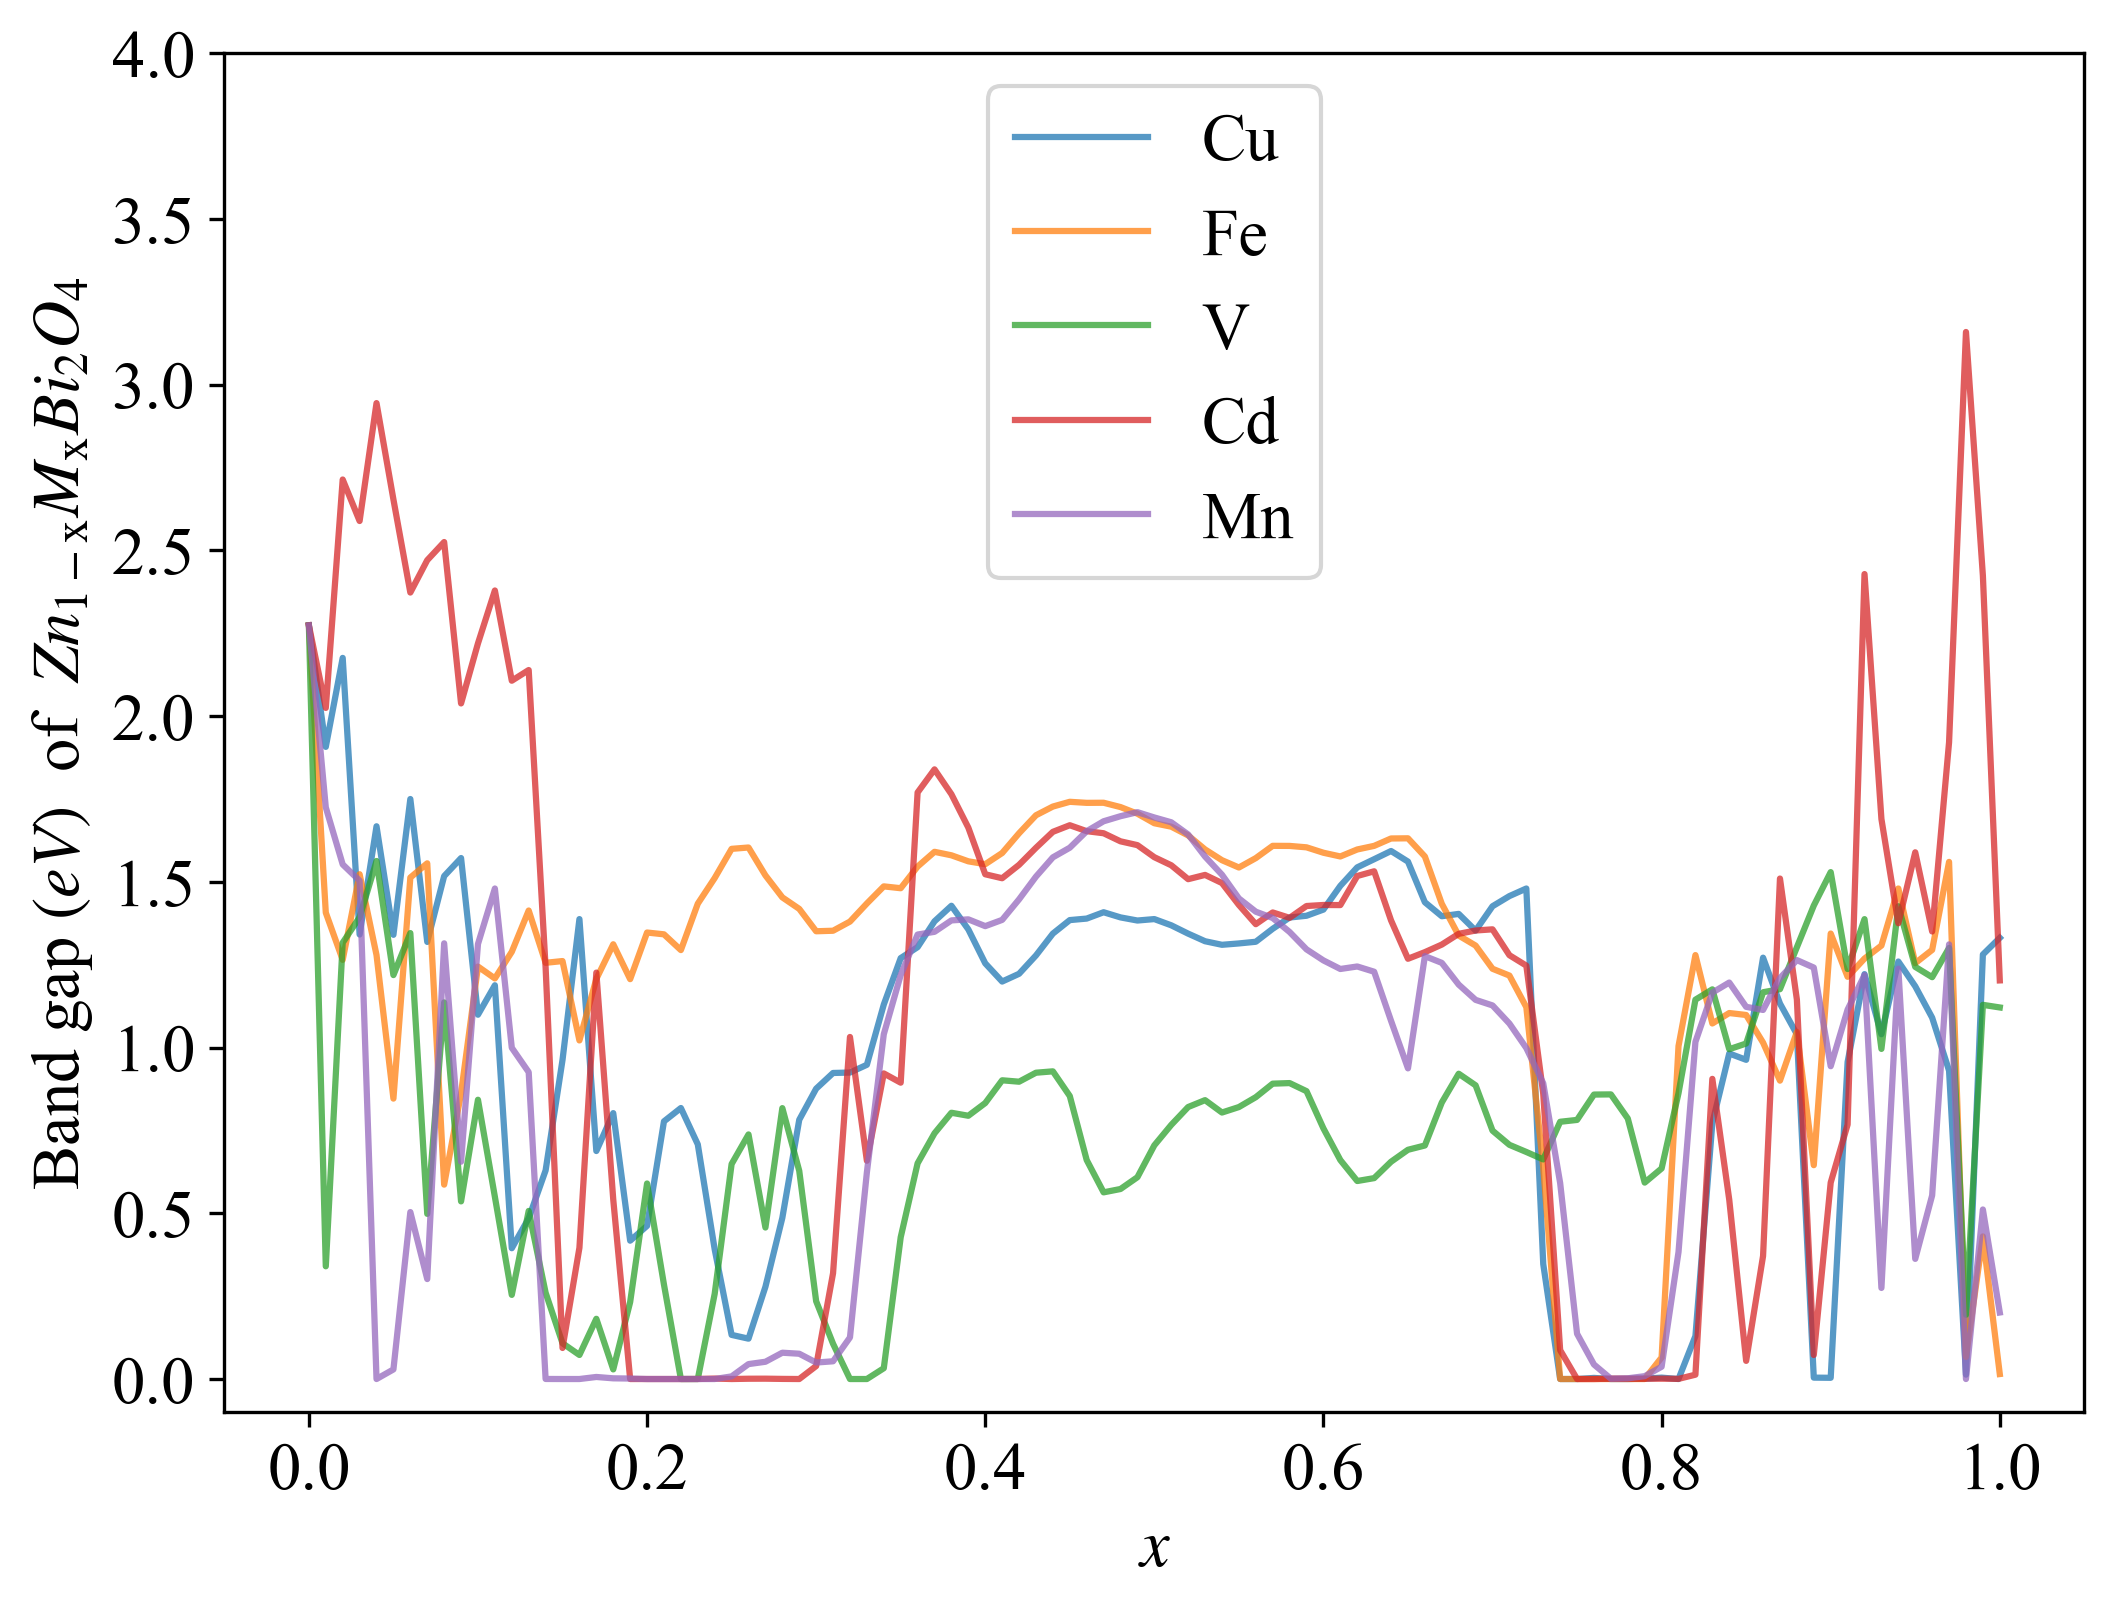

In [115]:
# analyze ZnBi2O4 A site
result = {}
for metal in ['Cu','Fe','V','Cd','Mn']:
    formulee = []
    values = []
    for x in np.arange(0,1.01,0.01):
        if x == 1:
            formula = f'{metal}Bi2O4'
        elif x == 0:
            formula = f'ZnBi2O4'
        else:
            formula = f'Zn{str(1-x)}{metal}{str(x)}Bi2O4'
        formulee.append(formula)
        values.append(x)
    data_to_predict = pd.DataFrame({'formula':formulee,'mental_quantities':values})
    data_to_predict['target'] = -1
    data_to_predict['spacegroup'] = 227
    model.load_data(data_to_predict)
    data_to_predict['band gap'] = model.predict(model.data_loader)[1]
    data_to_predict['band gap'] = data_to_predict['band gap'].map(lambda x : 0 if x<0 else x)
    data_to_predict = data_to_predict.drop(columns=['target','spacegroup','count'])
    plt.plot(data_to_predict['mental_quantities'],data_to_predict['band gap'],label=metal,alpha=0.75)

plt.legend()
plt.ylim(-0.1,4)
plt.ylabel('Band gap '+r'$(eV)$'+'  of  '+r'$ Zn_\mathrm{1-x}M_\mathrm{x}Bi_2O_4$')
plt.xlabel(r'$ x$')

Generating EDM: 100%|██████████| 201/201 [00:00<00:00, 111030.57formulae/s]


loading data with up to 4 elements in the formula
loading data with up to 4 elements in the formula
loading data with up to 4 elements in the formula


Generating EDM: 100%|██████████| 201/201 [00:00<00:00, 103227.02formulae/s]


loading data with up to 4 elements in the formula
loading data with up to 4 elements in the formula


Text(0.5, 0, '$ x$')

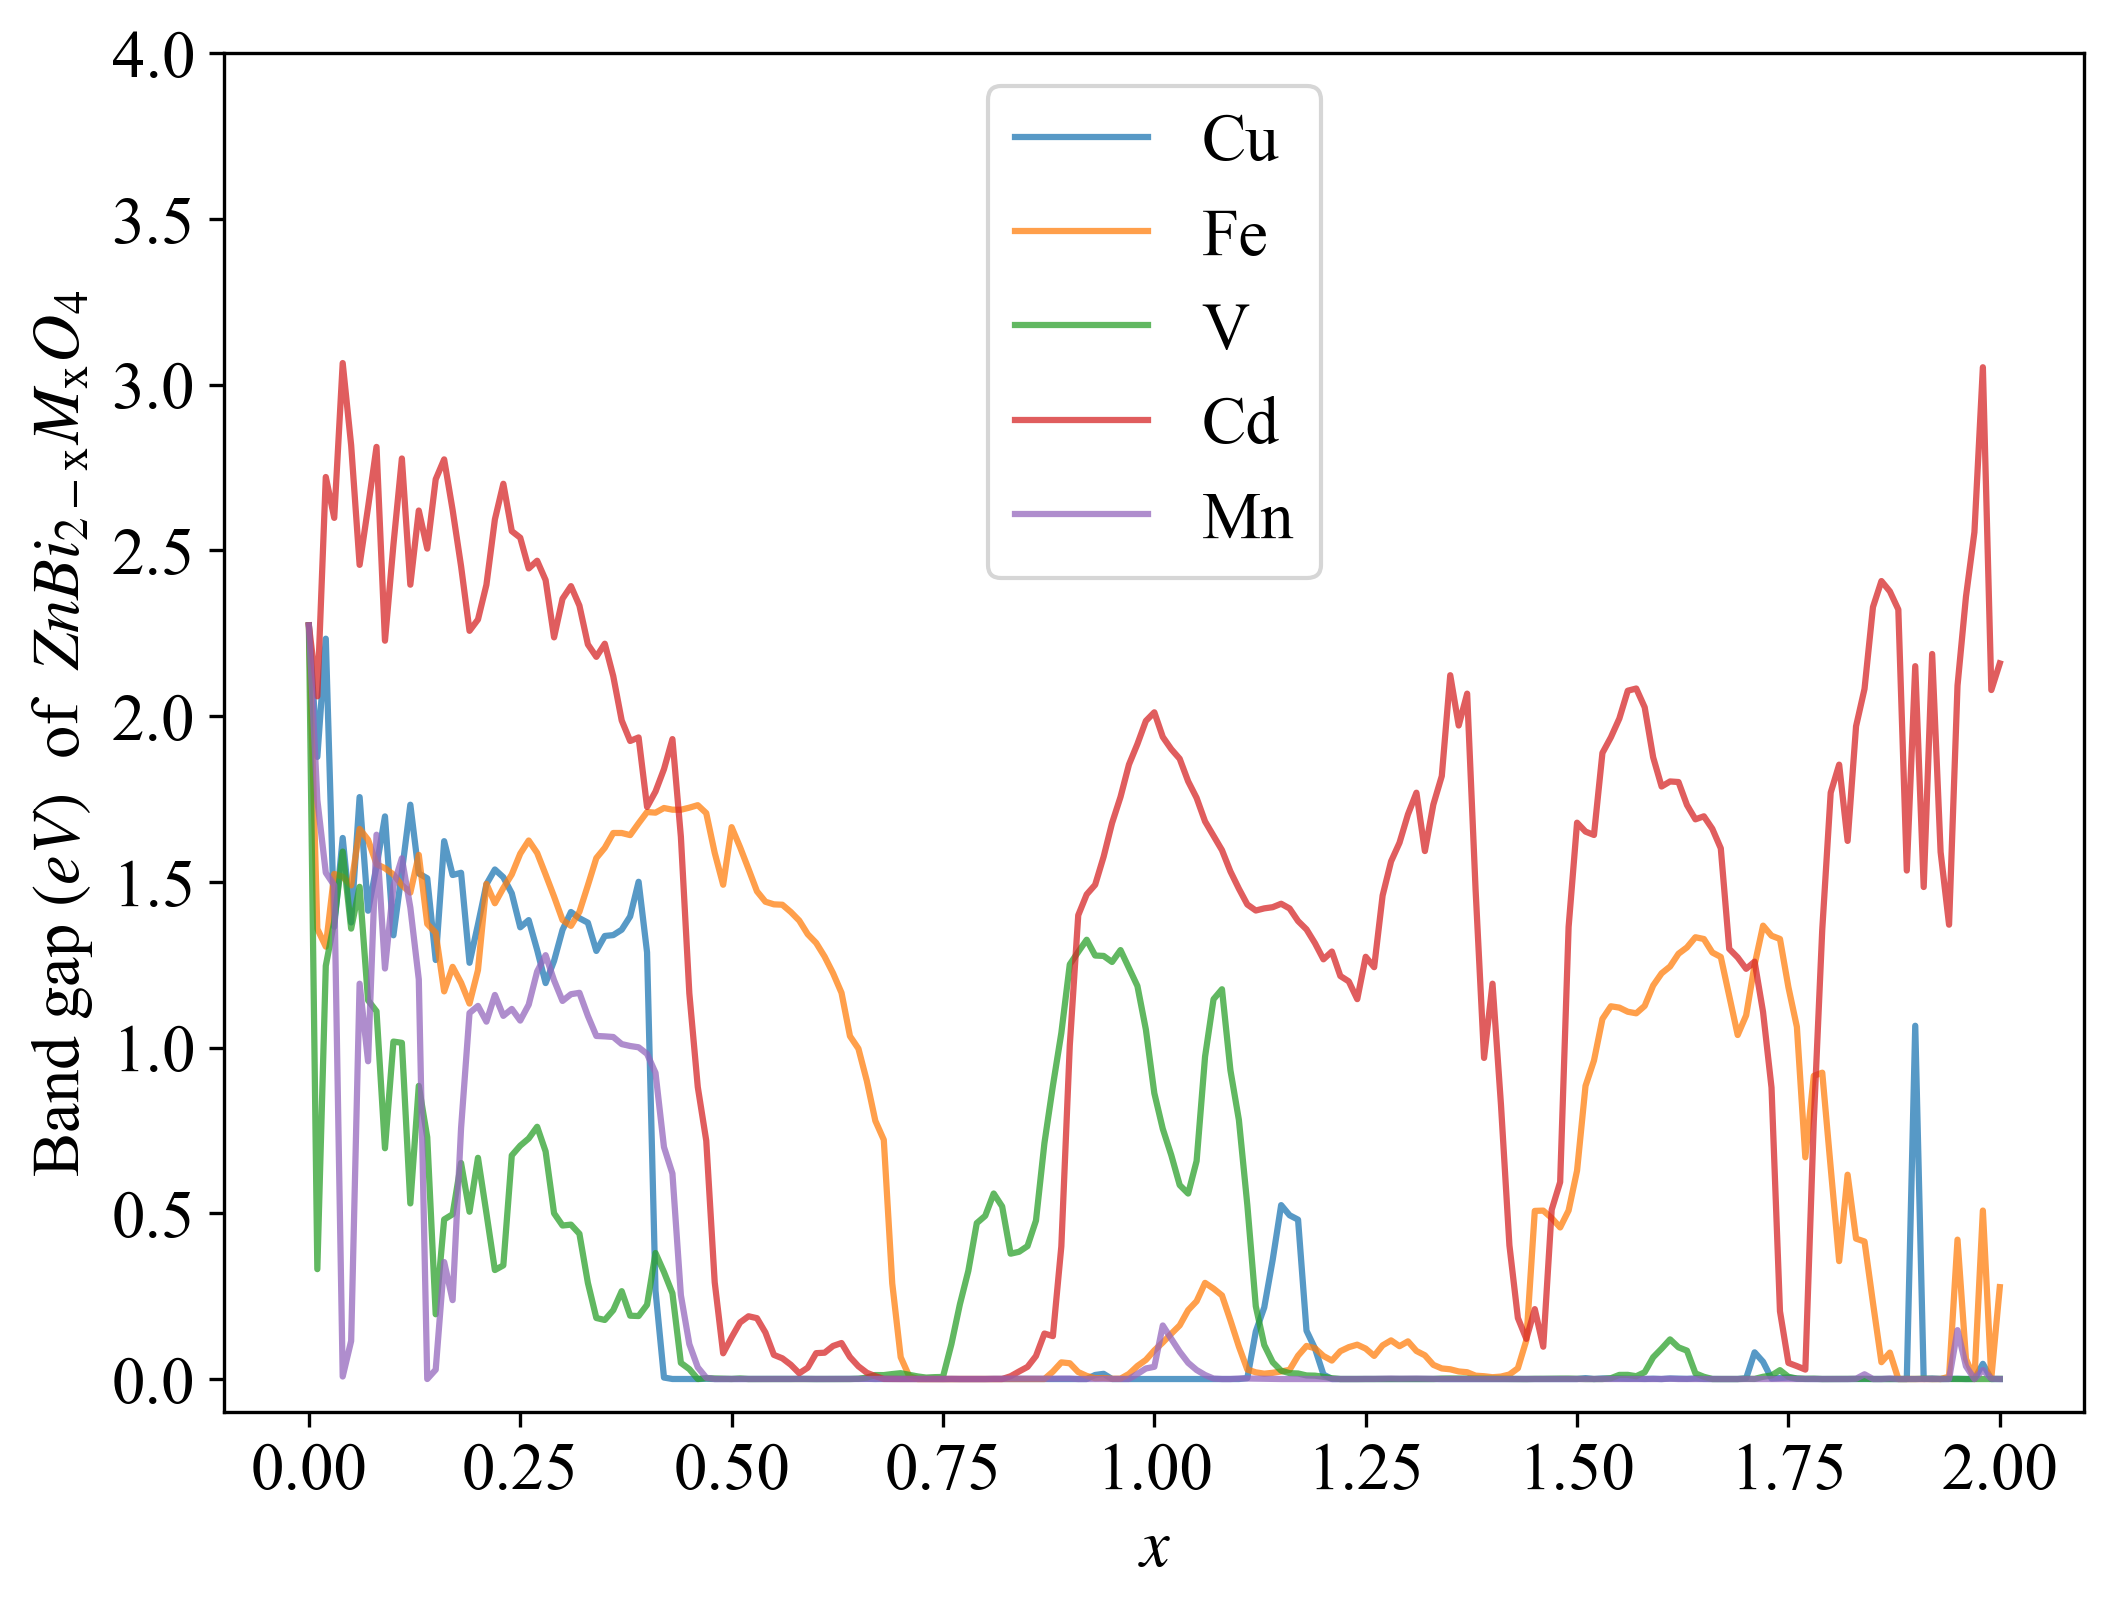

In [116]:
# analyze  B site
result = {}
for metal in ['Cu','Fe','V','Cd','Mn']:
    formulee = []
    values = []
    for x in np.arange(0,2.01,0.01):
        if x == 2:
            formula = f'Zn{metal}2O4'
        elif x == 0:
            formula = f'ZnBi2O4'
        else:
            formula = f'ZnBi{str(2-x)}{metal}{str(x)}O4'
        formulee.append(formula)
        values.append(x)
    data_to_predict = pd.DataFrame({'formula':formulee,'mental_quantities':values})
    data_to_predict['target'] = -1
    data_to_predict['spacegroup'] = 227
    model.load_data(data_to_predict)
    data_to_predict['band gap'] = model.predict(model.data_loader)[1]
    data_to_predict['band gap'] = data_to_predict['band gap'].map(lambda x : 0 if x<0 else x)
    data_to_predict = data_to_predict.drop(columns=['target','spacegroup','count'])
    plt.plot(data_to_predict['mental_quantities'],data_to_predict['band gap'],label=metal,alpha=0.75)

plt.legend()
plt.ylim(-0.1,4)
plt.ylabel('Band gap '+r'$(eV)$'+'  of  '+r'$ ZnBi_\mathrm{2-x}M_\mathrm{x}O_4$')
plt.xlabel(r'$ x$')